# Visualisation demo 
A 2D visualisation of how manuscript pages are laid out. 

In [1]:
from visualisation import * # Import everything we need

This is required to enable widget interactivity. '%matplotlib notebook' might also work. 

In [2]:
%matplotlib widget

Load in all the relevant data here (a sample of pages from 5 Medieval Christian and Islamic mansucripts).

In [3]:
import on2logic

manuscript_dataset, manuscript_label_to_name, manuscript_page_numbers = on2logic.load_image_folder_and_return_dataset('../data/images')
manuscript_dataloader = torch.utils.data.DataLoader(manuscript_dataset, batch_size=128, shuffle=False)
image_batch, label_batch = next(iter(manuscript_dataloader))

# precalculated embeddings
manuscript_vectors = np.load('numpy/vectors.npy')
manuscript_labels = np.load('numpy/labels.npy')

# Dataframe grouping everything together
manuscript_dataframe = on2logic.generate_manuscript_dataframe(manuscript_vectors, manuscript_labels, manuscript_label_to_name, manuscript_page_numbers)

In [4]:
x,y = projection(manuscript_vectors,method="umap")
cluster_model = cluster(x,y,method="Gaussian mixture",min_clusters=5)

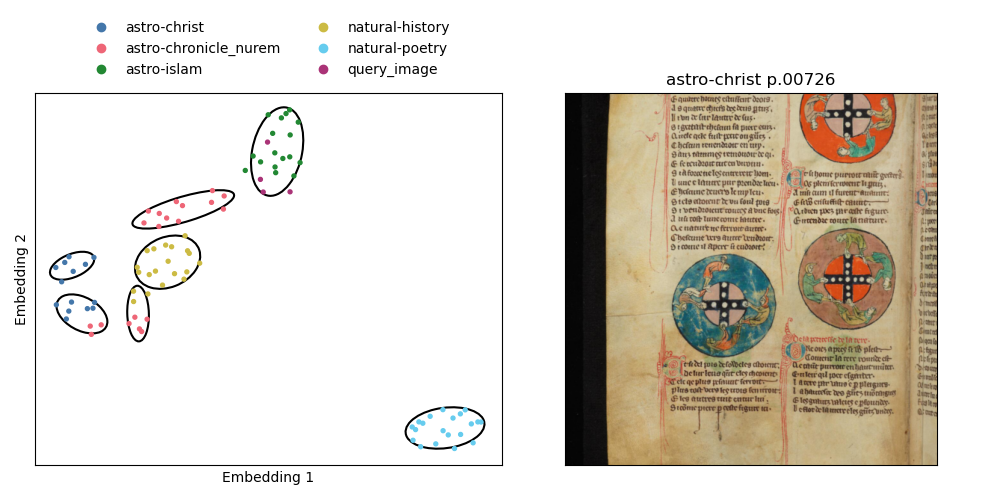

In [5]:
fig,(lax,rax,_) = display_visualisation(x,y,image_batch,manuscript_dataframe,cluster_model,
                        prototype_fts=False)